# Classification Shap

In [1]:
from BorutaShap import BorutaShap, load_data

X, y = load_data(data_type='classification')
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [2]:
# no model selected default is Random Forest, if classification is False it is a Regression problem
Feature_Selector = BorutaShap(importance_measure='shap',
                              classification=True)

Feature_Selector.fit(X=X, y=y, n_trials=100, random_state=0)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:59<00:00,  1.68it/s]

20 attributes confirmed important: ['mean perimeter', 'mean concavity', 'radius error', 'worst smoothness', 'mean texture', 'worst texture', 'worst perimeter', 'worst radius', 'concavity error', 'worst concavity', 'worst compactness', 'mean compactness', 'worst area', 'worst concave points', 'mean area', 'mean concave points', 'worst symmetry', 'perimeter error', 'area error', 'mean radius']
7 attributes confirmed unimportant: ['fractal dimension error', 'mean symmetry', 'mean fractal dimension', 'smoothness error', 'symmetry error', 'texture error', 'compactness error']
3 tentative attributes remains: ['concave points error', 'worst fractal dimension', 'mean smoothness']


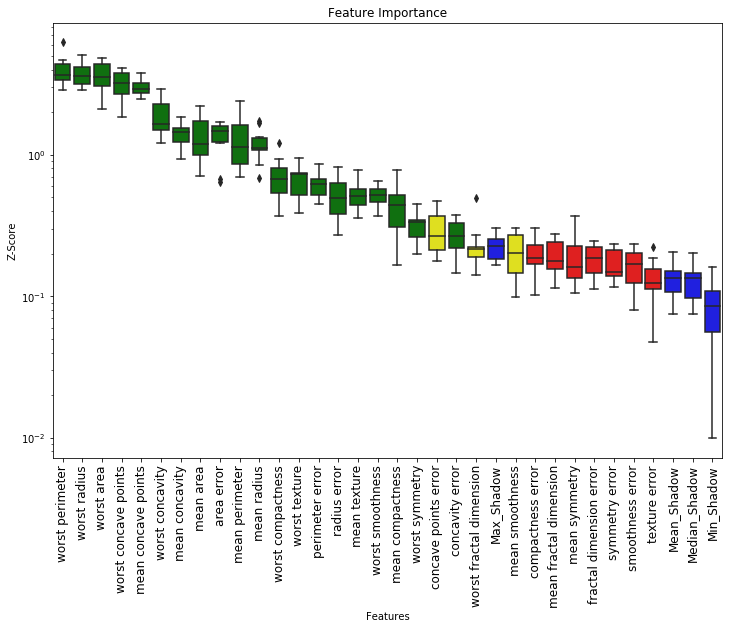

In [3]:
# Returns Boxplot of features
Feature_Selector.plot(X_size=12, figsize=(12,8),
            y_scale='log', which_features='all')

In [4]:
# as 3 attributes are still undecided we have two choices either increase the n_trials or use the TentativeRoughFix()
# method which compares the median values of the max shadow feature and the undecided features.
Feature_Selector.TentativeRoughFix()

1 tentative features are now accepted: ['concave points error']
2 tentative features are now rejected: ['worst fractal dimension' 'mean smoothness']


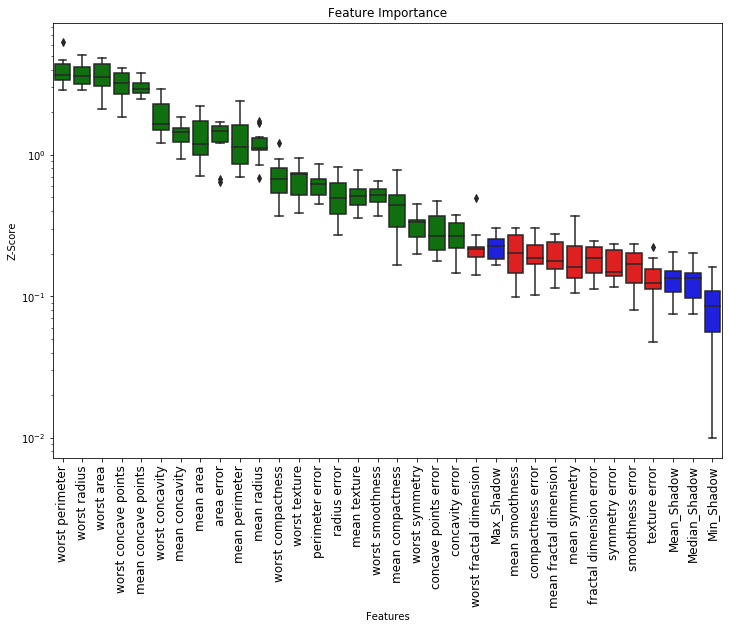

In [5]:
# Returns Boxplot of features
Feature_Selector.plot(X_size=12, figsize=(12,8),
            y_scale='log', which_features='all')

In [7]:
# Returns a subset of the original data with the selected features
subset = Feature_Selector.Subset()
subset.head()

,mean perimeter,mean concavity,radius error,worst smoothness,mean texture,worst texture,worst perimeter,worst radius,concavity error,worst concavity,...,mean compactness,worst area,worst concave points,mean area,mean concave points,worst symmetry,perimeter error,area error,mean radius,concave points error
0,122.80,0.3001,1.0950,0.1622,10.38,17.33,184.60,25.38,0.05373,0.7119,...,0.27760,2019.0,0.2654,1001.0,0.14710,0.4601,8.589,153.40,17.99,0.01587
1,132.90,0.0869,0.5435,0.1238,17.77,23.41,158.80,24.99,0.01860,0.2416,...,0.07864,1956.0,0.1860,1326.0,0.07017,0.2750,3.398,74.08,20.57,0.01340
2,130.00,0.1974,0.7456,0.1444,21.25,25.53,152.50,23.57,0.03832,0.4504,...,0.15990,1709.0,0.2430,1203.0,0.12790,0.3613,4.585,94.03,19.69,0.02058
3,77.58,0.2414,0.4956,0.2098,20.38,26.50,98.87,14.91,0.05661,0.6869,...,0.28390,567.7,0.2575,386.1,0.10520,0.6638,3.445,27.23,11.42,0.01867
4,135.10,0.1980,0.7572,0.1374,14.34,16.67,152.20,22.54,0.05688,0.4000,...,0.13280,1575.0,0.1625,1297.0,0.10430,0.2364,5.438,94.44,20.29,0.01885


# Classification Shap Sampling

In [14]:
# no model selected default is Random Forest, if classification is False it is a Regression problem
Feature_Selector = BorutaShap(importance_measure='shap',
                              classification=True)

Feature_Selector.fit(X=X, y=y, n_trials=100, random_state=0, sample=True)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:29<00:00,  3.35it/s]

19 attributes confirmed important: ['mean perimeter', 'mean concavity', 'radius error', 'worst smoothness', 'mean texture', 'worst texture', 'worst perimeter', 'worst radius', 'worst concavity', 'worst compactness', 'mean compactness', 'worst area', 'worst concave points', 'mean area', 'mean concave points', 'worst symmetry', 'perimeter error', 'area error', 'mean radius']
7 attributes confirmed unimportant: ['fractal dimension error', 'mean symmetry', 'mean fractal dimension', 'smoothness error', 'symmetry error', 'texture error', 'compactness error']
4 tentative attributes remains: ['concave points error', 'worst fractal dimension', 'mean smoothness', 'concavity error']


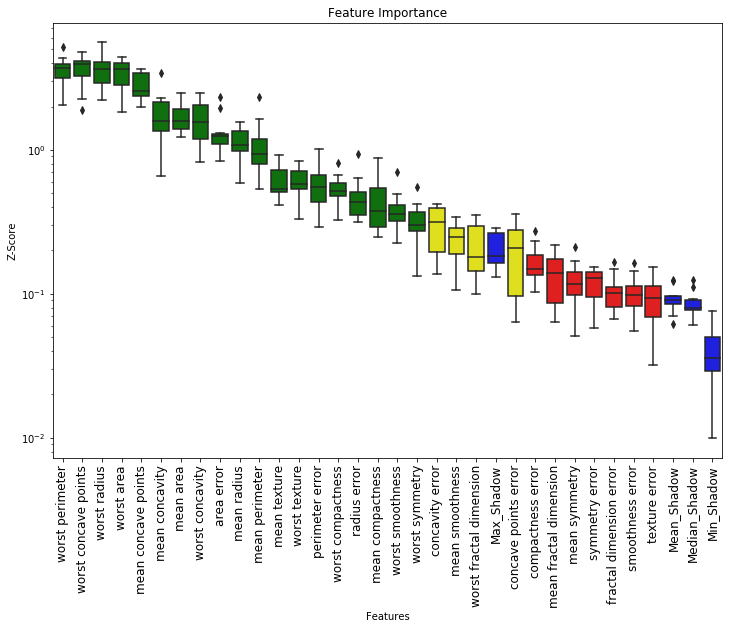

In [15]:
# Returns Boxplot of features
Feature_Selector.plot(X_size=12, figsize=(12,8),
            y_scale='log', which_features='all')

In [16]:
# as 4 attributes are still undecided we have two choices either increase the n_trials or use the TentativeRoughFix()
# method which compares the median values of the max shadow feature and the undecided features.
Feature_Selector.TentativeRoughFix()

4 tentative features are now accepted: ['concave points error' 'worst fractal dimension' 'mean smoothness'
 'concavity error']
0 tentative features are now rejected: []


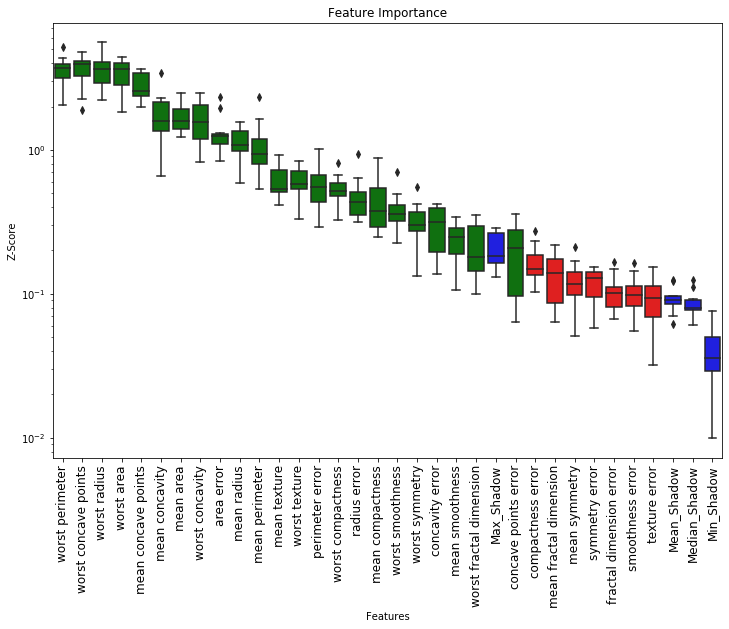

In [17]:
# Returns Boxplot of features
Feature_Selector.plot(X_size=12, figsize=(12,8),
            y_scale='log', which_features='all')

# Classification Gini

In [18]:
# no model selected default is Random Forest, if classification is False it is a Regression problem
Feature_Selector = BorutaShap(importance_measure='gini',
                              classification=True)

Feature_Selector.fit(X=X, y=y, n_trials=100, random_state=0)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:24<00:00,  4.12it/s]

23 attributes confirmed important: ['mean perimeter', 'mean concavity', 'radius error', 'worst smoothness', 'mean texture', 'worst texture', 'worst perimeter', 'worst radius', 'concavity error', 'worst concavity', 'worst compactness', 'mean compactness', 'worst fractal dimension', 'mean smoothness', 'worst area', 'worst concave points', 'mean area', 'mean concave points', 'concave points error', 'worst symmetry', 'perimeter error', 'area error', 'mean radius']
5 attributes confirmed unimportant: ['mean symmetry', 'mean fractal dimension', 'smoothness error', 'symmetry error', 'texture error']
2 tentative attributes remains: ['fractal dimension error', 'compactness error']


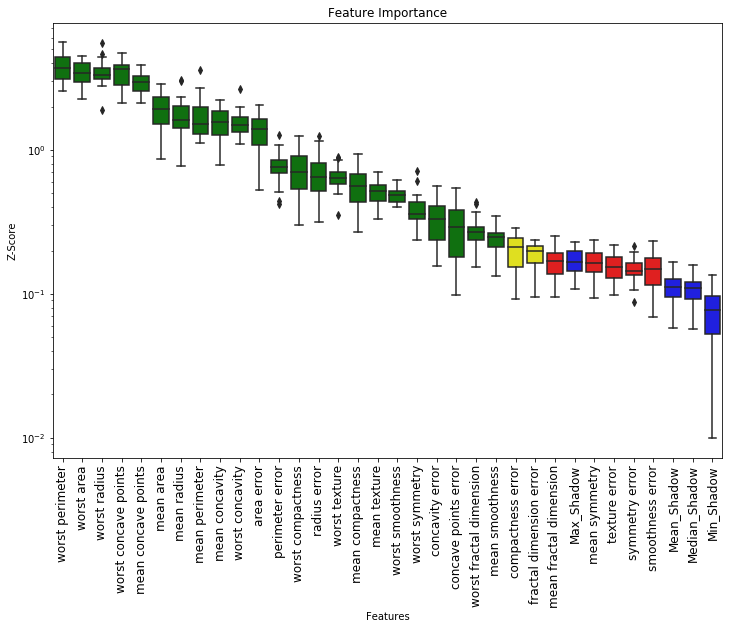

In [19]:
# Returns Boxplot of features
Feature_Selector.plot(X_size=12, figsize=(12,8),
            y_scale='log', which_features='all')

In [20]:
# as 2 attributes are still undecided we have two choices either increase the n_trials or use the TentativeRoughFix()
# method which compares the median values of the max shadow feature and the undecided features.
Feature_Selector.TentativeRoughFix()

2 tentative features are now accepted: ['fractal dimension error' 'compactness error']
0 tentative features are now rejected: []


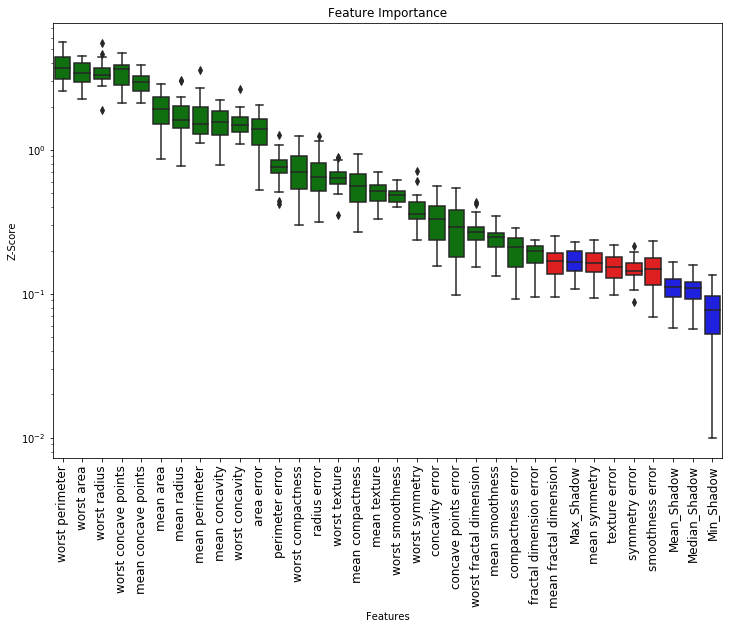

In [21]:
# Returns Boxplot of features
Feature_Selector.plot(X_size=12, figsize=(12,8),
            y_scale='log', which_features='all')